In [2]:
import pandas as pd
import psycopg as pg
import matplotlib.pyplot as plt 
import numpy as np
import json

engine = pg.connect("dbname='cpun' user='cpun' host='149.89.160.100' port='5432' password='C#Gh$!SY3@%vG5'")
df_pokemon = pd.read_sql('select * from pokedex_pokemon', con=engine)
df_trainer = pd.read_sql('select * from pokedex_trainer', con=engine)
df_energy = pd.read_sql('select * from pokedex_energy', con=engine)

/tmp/ipykernel_164473/2971081310.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pokemon = pd.read_sql('select * from pokedex_pokemon', con=engine)
/tmp/ipykernel_164473/2971081310.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trainer = pd.read_sql('select * from pokedex_trainer', con=engine)
/tmp/ipykernel_164473/2971081310.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_energy = pd.read_sql('select * from pokedex_energy', con=engine)


In [4]:
df_pokemon

,id,card_id,name,rarity,image,prices,highest_market_price
0,1,base1-1,Alakazam,Rare Holo,https://images.pokemontcg.io/base1/1_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,43.54
1,2,base1-4,Charizard,Rare Holo,https://images.pokemontcg.io/base1/4_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,341.45
2,3,base1-5,Clefairy,Rare Holo,https://images.pokemontcg.io/base1/5_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,19.19
3,4,base1-2,Blastoise,Rare Holo,https://images.pokemontcg.io/base1/2_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,123.34
4,5,base1-3,Chansey,Rare Holo,https://images.pokemontcg.io/base1/3_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,27.93
...,...,...,...,...,...,...,...
63,64,base1-63,Squirtle,Common,https://images.pokemontcg.io/base1/63_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,1.37
64,65,base1-66,Tangela,Common,https://images.pokemontcg.io/base1/66_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.36
65,66,base1-67,Voltorb,Common,https://images.pokemontcg.io/base1/67_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.83
66,67,base1-68,Vulpix,Common,https://images.pokemontcg.io/base1/68_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.52


[68, 26, 7]


Text(0, 0.5, 'Number of Cards')

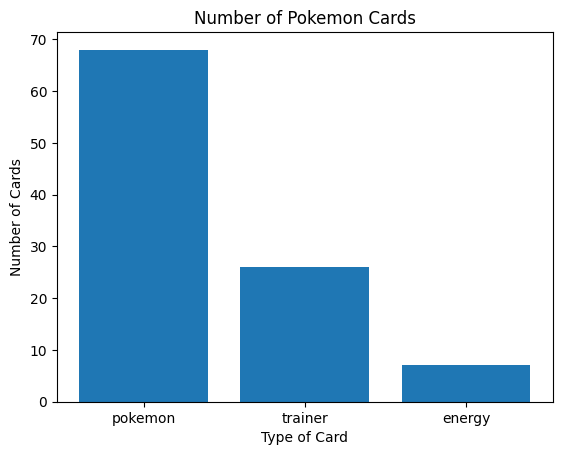

In [4]:
# bar graph grouping by supertype and rarity of number of cards

# cat = [df_pokemon, df_trainer, df_energy]
# result = pd.concat(cat)

pokemon = len(df_pokemon.index)
trainer = len(df_trainer.index)
energy = len(df_energy.index)

sizes = [Pokemon, Trainer, Energy]
names = ['pokemon','trainer', 'energy']
print(sizes)
plt.bar(names, sizes)
plt.title('Number of Pokemon Cards')
plt.xlabel('Type of Card')
plt.ylabel('Number of Cards')

# plt.show()

In [7]:
pokemon_r = (df_pokemon.groupby('rarity').size())
print(pokemon_r)

rarity
Common       27
Rare          6
Rare Holo    15
Uncommon     20
dtype: int64
